# Homework 1 Part 1

# Problem 1

**Consider the block diagram for a supervised learning system depicted below. Name each block and explain in words the function of each block.**

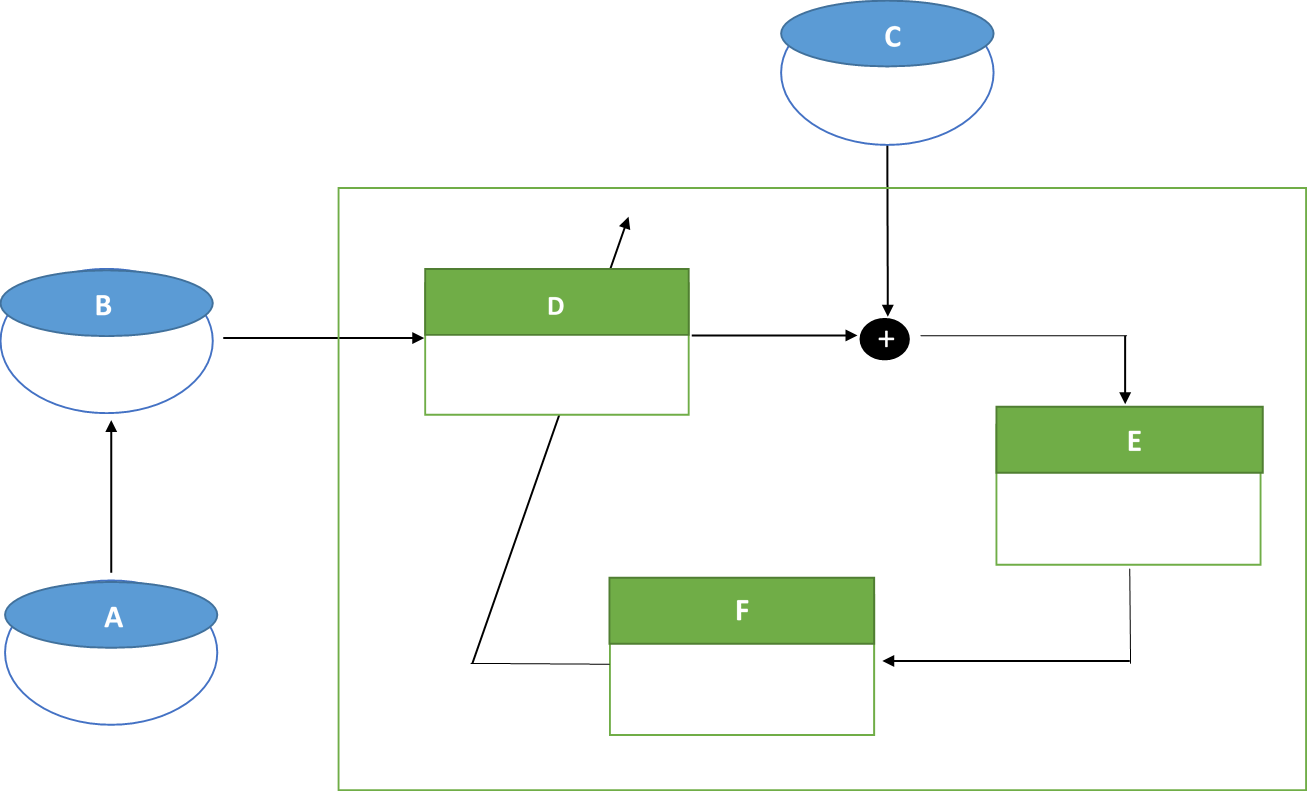

In [1]:
from IPython.display import Image
Image('figures/BlockDiagram.png', width=600)

* A: Input Space, $\mathbf{X}=\{x_i\}_{i=1}^N$. This block includes data acquisition. It can refer to either raw data or pre-processed data.
* B: Feature Space, $\phi(x)$. This block will select or extract features to create the feature space.
* C: Target, $\mathbf{t}$. This block will contain the target labels associated with each sample in order to compute an error value.
* D: Mapper or Model, $y=f(\phi(x),\mathbf{w})$. This block defines the mapper function as a function of the (unknown) parameters $\mathbf{w}$ and features $\phi(x)$.
* E: Objective function, $J(\mathbf{w})$. This block is responsible for evaluating the selected objective function given the mapper's output $y$ and the target label $t$.
* F: Learning algorithm, $\mathbf{w}^{(t+1)}$. This block is responsible for updating the values of the parameters $\mathbf{w}$ in the mapper function such that the objective function is optimized.

# Problem 2

**The figure below illustrates the hyperparameter tuning performance in two datasets (training and validation) as a function of the model order, $M$, in the polynomial regression mapper function (or model).**

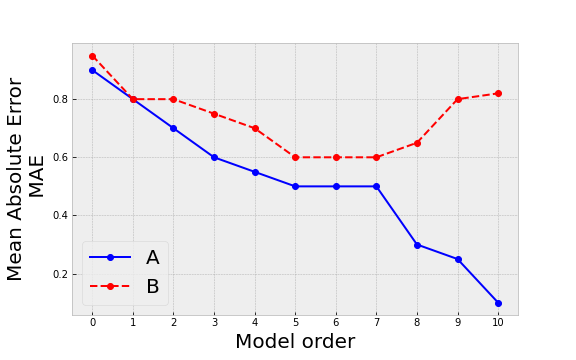

In [2]:
Image('figures/performance.png', width=400)

**Based on these graph, answer the following questions:**

1. **Which line (A or B) correspond to the train and validation sets?**
2. **Based on these results, which model order $M$ would you select for the final model?**

**Justify your answers.**

1. Line A corresponds to the training set performance because as the model order increases, the error measure decreases as the model starts to overfit to the training set. Line B corresponds to the validation set performance. From the plot we see that at first the error measure decreases as model order increases, but then it starts to increase as the model starts to overfit to the training set.

2. We want to select the model order that minimizes the error measure in both training and validation set. From the plot, we see that model order 5, 6 and 7 are good candidates. Applying the Occam's razor principle, we should the model order that will produce a simpler model (less computational expensive, requiring less memory). Therefore, based on this plot, we should choose model order 5.

# Problem 3

**In practice, what strategies can you apply to avoid overfitting?**

1. Add more data: More data prevents the model from memorizing the training data. But it can increase the computation cost.
2. Regularization: Include a regularization penalty on the model's parameters. It has been observed that the model parameters become too large when the model is overfitting. So we can include a regularization penalty that enforces the parameters to be small.
3. Cross-validation: Perform cross-validation to make sure the model generalizes and learns from all sets of samples.
4. Reduce complexity: Consider a model with reduced complexity. A more complex models tend to require more data to train and often times, tend to overfit.

# Problem 4

**In practice, how can you determine whether you have overfitted your machine learning system?**

Cross-validation: By looking at the accuracy on training set and validation set, one can determine if the model is overfitted. In overfitting, the train set accuracy is very high, but the validation set accuracy is low. 

# Problem 5

**Suppose you have 100 training samples that you are using to train a classifier to distinguish between four classes. The training data has 50 samples of class 1, 25 samples of class 2, 20 samples of class 3 and 5 samples of class 4. To evaluate the stability and performance of your classifier on each class, you use 10-fold cross-validation. Is it a good strategy to randomly partition the data into 10 folds? Why or why not? If yes, fully justify why. If no, state why not, provide an alternate cross-validation scheme and justify the new scheme.**

In this example 10-fold CV is not an appropriate CV strategy because the data samples are imbalanced. A random partition may place all samples from class 4 in one set, and the model would not be able to "see" these samples in validation. The model may end up having a good accuracy because all other samples are overwhelming represented in the data compared to class 4.

In this scenario, assuming we do not have access to more data, it will be wise to use stratified CV with no more than 5 folds, in order to ensure that each fold contains at least 1 sample per class, hence preserve the prior probabilities of each class. In general, each fold will have the same percentage of samples for each class.

# Problem 6

**Suppose that you split your data into training and test sets, and perform cross-validation with the training set to select the best set of parameters for the model. Can the model still overfit? Justify your answer.**

Yes, overfitting is still possible. Cross-validation is a technique that mitigates the problem of overfitting but it does not solve it. This is particularly true when the training set is small and/or does not include representatives for what the type of samples we may see in test.

# Problem 7

**Answer the following questions:**

1. **Name one advantage and one disadvantage of using regularization.**

2. **In practice, how criteria would you use to decide between ridge, lasso and elastic net regularization?**

1. One benefit of utilizing regularization is that it helps in preventing overfitting by regularizing theparameter solutions. A challenge in utilizing a regularization term is in determining the value for theparameter that controls the trade-off between optimizing the error term in the objective functionand the penalty term in the objective function. This value must be incorporate in the set ofcontrollable parameters to be determined using cross-validation.

2. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

# Problem 8

**Once you complete hyperparameter tuning, that is, you have identified the numerical values for all hypermarameters, how is the final model trained?**

The final model must be trained with the whole training set using the values for the hyperparameters determined using cross-validation.

# Problem 9

**The figure below, shows how the weights associated with each with the 10 attributes/features change as a function of the regularizer parameter $\lambda$ in a linear regression model.**

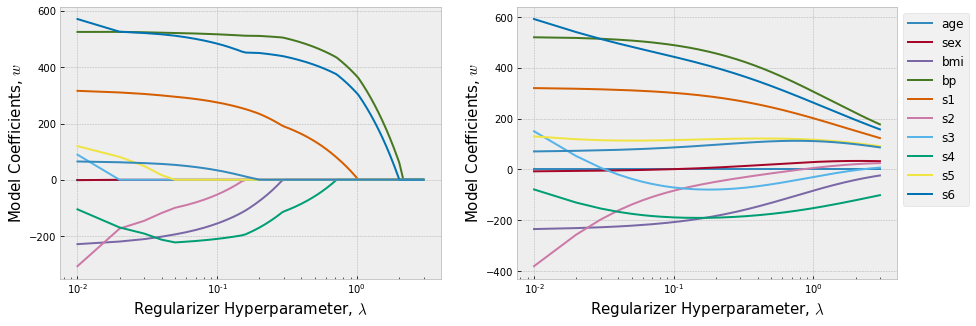

In [3]:
Image('figures/Regression_with_Regularizer.png', width=900)

**Based on this plots, which one (left or right) corresponds to the Ridge Regression and Lasso Regression? Justify your answer.**

We see that on the plot in the left, as the regularizer hyperparameter $\lambda$ increases, the coefficients $w_j$ converge to exactly 0. Thus the vector of coefficients, $\mathbf{w}$, will be sparse. This is a particular characteristic of the Lasso regularizer. Thus, ridge regularizer, corresponds to the plot on the right, where we see that the parameters $\mathbf{w}$ are decreasing in value but never reaching exactly 0.

# Problem 10

**In practice, when you are implementing your regression or classification tasks with your feature matrix $\mathbf{X}$ of size $N\times M$, $N$ is the number of training samples and $M$ is the number of dimensions/features.**

**If you encounter the computational error "matrix is singular":**

1. **What does this mean about the feature matrix $\mathbf{X}$?**
2. **What should you do to solve the problem?**

1. It means the matrix is not invertible because its determinant is equal to zero. A singular matrix has at least one eigenvalue equal to 0 which occurs when features are co-linear.
2. We should diagonally load the matrix before inverting it.

# Problem 11

**What is the Bayesian interpretation of the objective function?**

\begin{align*}
J(\mathbf{x},\mathbf{w}) = \frac{1}{2} \sum_{i=1}^N (t_i-y_i)^2 + \frac{\lambda}{2} \sum_{j=0}^M w_j^2
\end{align*}

**How is this interpretation beneficial in practice?**

The Bayesian interpretation of this objective function says that this problem is equivalent at fitting a data Gaussian-distributed data likelihood with a Gaussian-distributed prior on the parameters $\mathbf{w}$.

This interpretation opens the possibilities to the different types of priors that can be incorporated in the objective function. One can choose for a wide list of well-defined probabilistic models (Laplacian, Exponential, Uniform, Gaussian, etc.) or a custom-built prior probabilistic model.

---